# Lab 13
- PCA
- TSNE

## PCA (Principal Component Analysis)
Analiza głównych składników jest szybką metodą redukcji wymiarowości danych.
Polega na znalezieniu liniowej transformacji zbioru zmiennych początkowych w mniej liczny zbiór zmiennych, zwanych składowymi głównymi. Jest to pewien sposób kompresji danych, dlatego metodę tę można wykorzystać w wielu dziedzinach nauki.


**Algorytm PCA:**
1. Standaryzacja danych
2. Wyznaczenie macierzy kowariancji $Σ$ między zmiennymi początkowymi
3. Wyznaczenie wartości własnych macierzy kowariancji
4. Wybranie $k$ największych wartości własnych i wyznaczenie dla nich wektorów własnych
5. Utworzenie macierzy przekształcenia liniowego $W$, bazującej na wektorach własnych
6. Przekształcenie zmiennych początkowych według wzoru $Y = WX$

![](./fig/pca_matrix.png)
![](./fig/pca_gif.gif)

### Przykład dla sztucznych danych

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

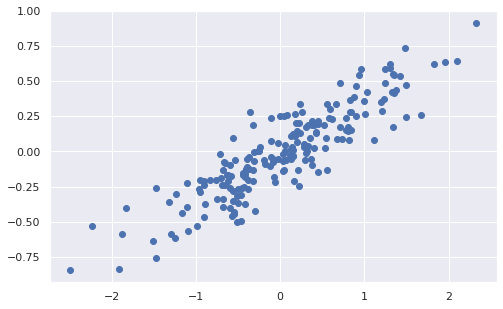

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Jeden komponent

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# Kierunki zmiennych PCA
pca.components_

array([[-0.94446029, -0.32862557]])

In [6]:
# Wyjaśniona wariancja
print(f'Total variance: {np.sqrt(np.std(X)):.4f}')
pca.explained_variance_

Total variance: 0.7897


array([0.7625315])

In [7]:
# Procent wyjaśnionej wariancji
pca.explained_variance_ratio_

array([0.97634101])

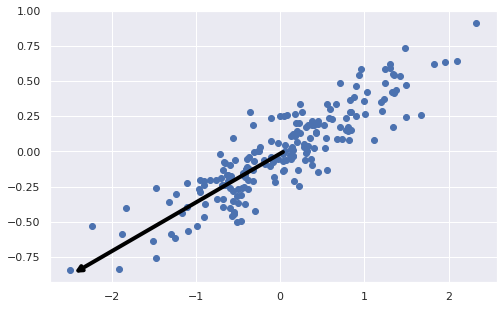

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

#### 2 komponenty

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Kierunki zmiennych PCA
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [11]:
# Wyjaśniona wariancja
print(f'Total variance: {np.sqrt(np.std(X)):.4f}')
pca.explained_variance_

Total variance: 0.7897


array([0.7625315, 0.0184779])

In [12]:
# Procent wyjaśnionej wariancji
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

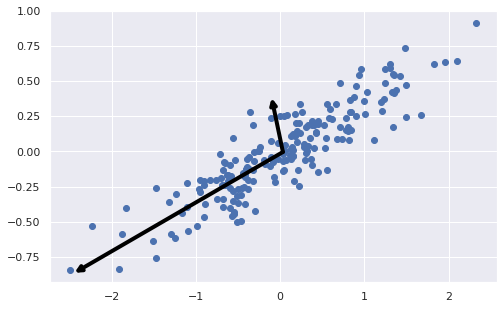

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

### Dobieranie odpowiedniej liczby komponentów

In [14]:
import pandas as pd
hitters = pd.read_csv('hitters.csv')
hitters.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,1,1,632,43,10,475.0,1
1,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,0,1,880,82,14,480.0,0
2,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,1,0,200,11,3,500.0,1
3,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,1,0,805,40,4,91.5,1
4,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,0,1,282,421,25,750.0,0


#### Wydzielenie zmiennej celu i podział na zbiór treningowy i testowy

In [15]:
from sklearn.model_selection import train_test_split

y = hitters['NewLeague']
X = hitters.drop(['Name','NewLeague','League','Division'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

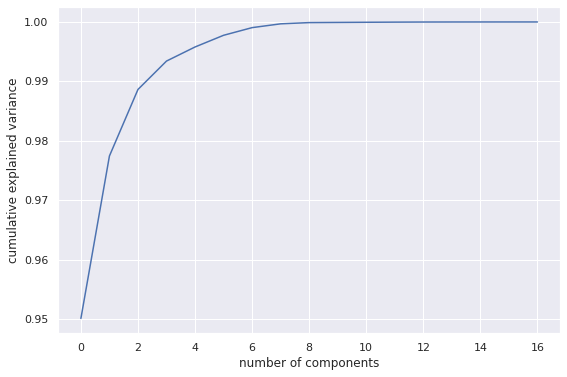

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

plt.figure(figsize=(9,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Zobaczmy jak poradzi sobie klasyfikacja dla surowych danych i dla PCA

Accuracy bez PCA: 0.5185


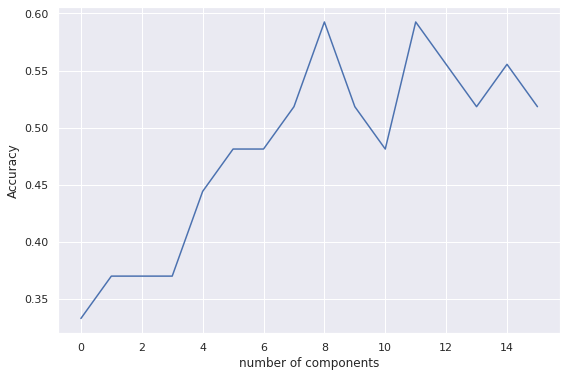

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=0)

# Surowe dane
y_hat = model.fit(X_train,y_train).predict(X_test)
print(f'Accuracy bez PCA: {accuracy_score(y_test, y_hat):.4f}')

# PCA - odczytane z wykresu
acc = []
for i in range(1,17):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    y_hat = model.fit(pca.transform(X_train),y_train).predict(pca.fit_transform(pca.transform(X_test)))
    acc.append(accuracy_score(y_test, y_hat))
    
plt.figure(figsize=(9,6))
plt.plot(acc)
plt.xlabel('number of components')
plt.ylabel('Accuracy');

## TSNE